In [43]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import math
import matplotlib.pyplot as plt
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")

In [44]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [45]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [46]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [47]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [49]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [50]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [51]:
df.head(50)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
5,6.0,30-06-2013,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,...,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0
6,7.0,30-06-2013,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,...,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.0985,5849.233398,30.9,23.4
7,8.0,30-06-2013,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,...,0.000000,0.000000,0.000000,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9
8,9.0,30-06-2013,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,...,0.000000,0.000000,0.000000,37.4967,126.826,50.9312,0.4125,5876.901367,31.3,21.6
9,10.0,30-06-2013,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,...,0.000000,0.000000,0.000000,37.4562,126.955,208.5070,5.1782,5893.608398,30.5,21.0


In [52]:
df.skew()

station             0.000000
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64

<AxesSubplot:>

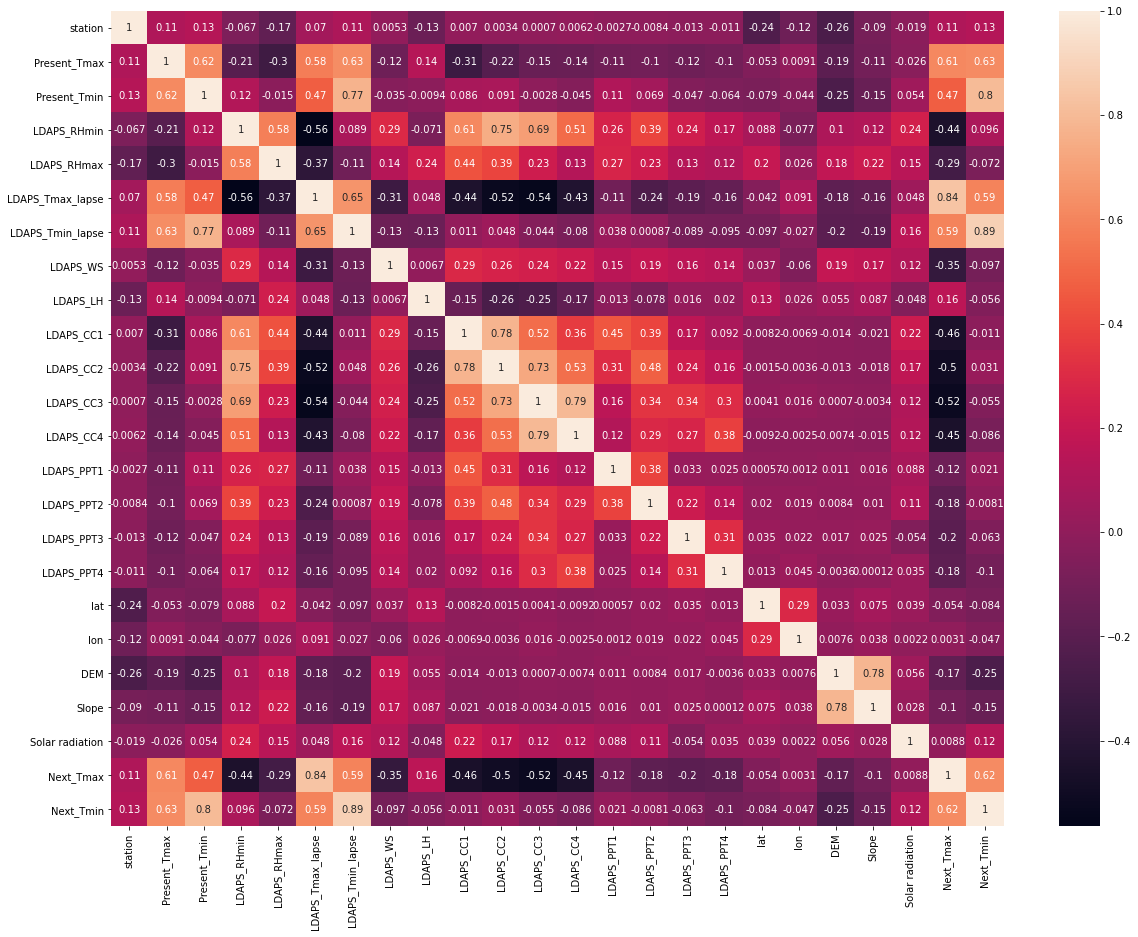

In [53]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [54]:
data=df.drop(["Date"],axis=1)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


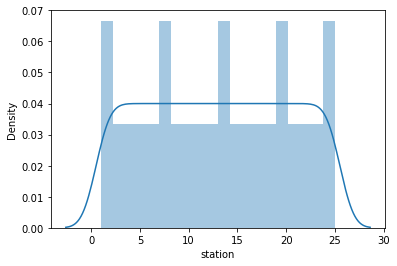

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


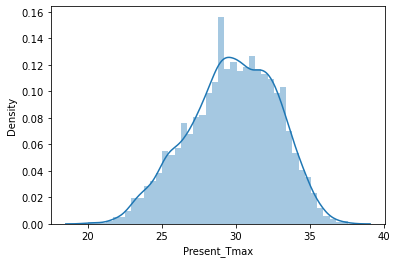

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


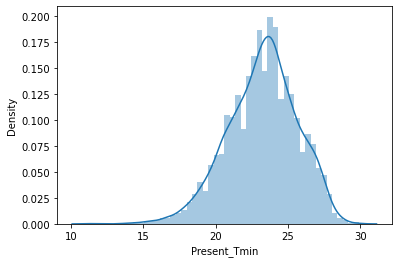

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


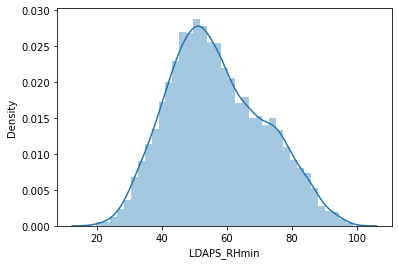

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


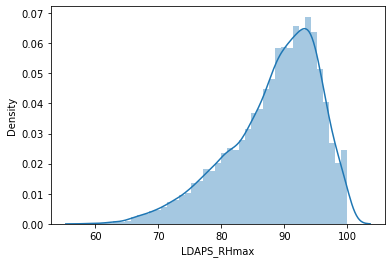

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


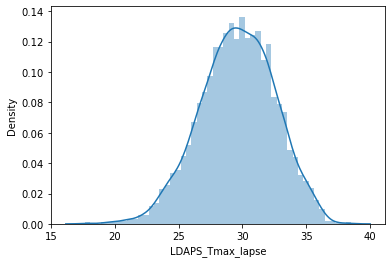

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


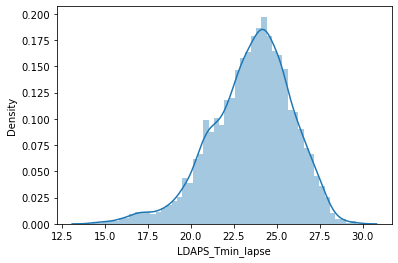

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


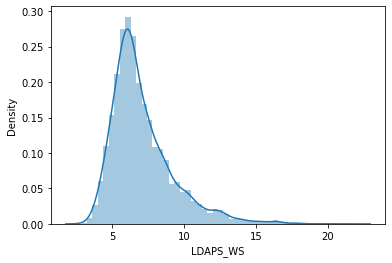

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


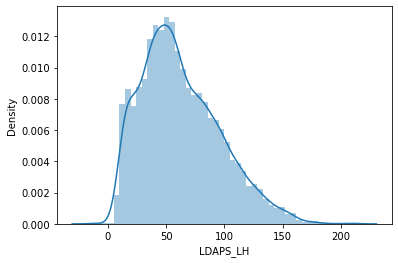

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


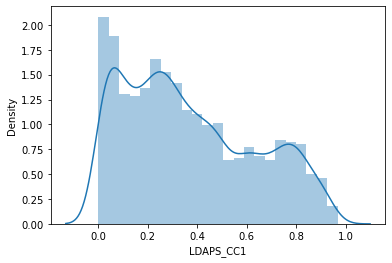

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


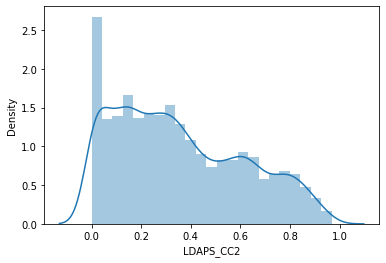

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


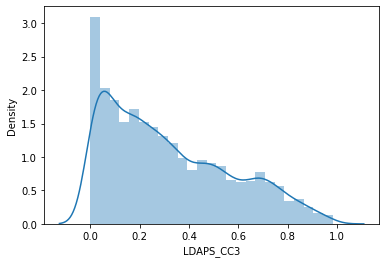

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


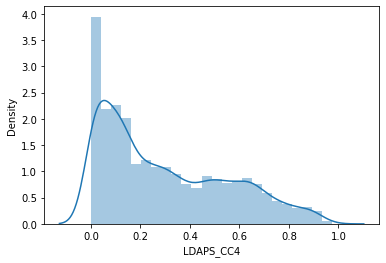

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


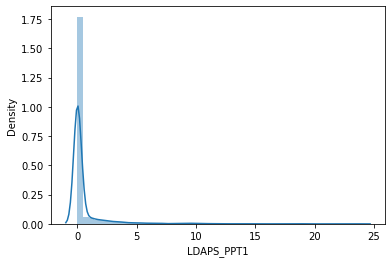

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


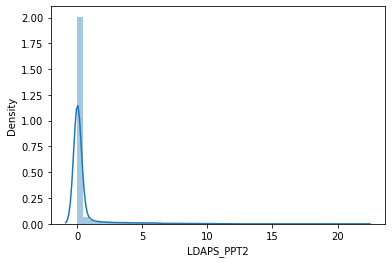

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


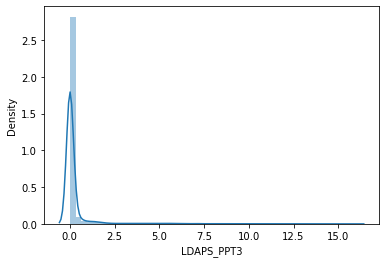

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


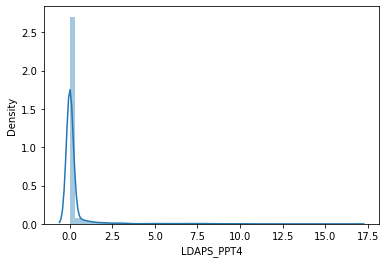

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


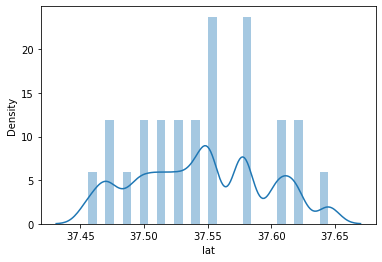

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


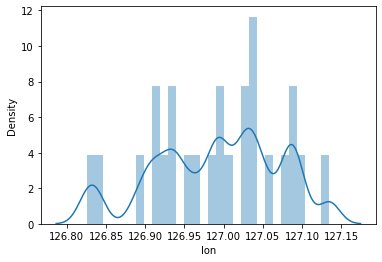

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


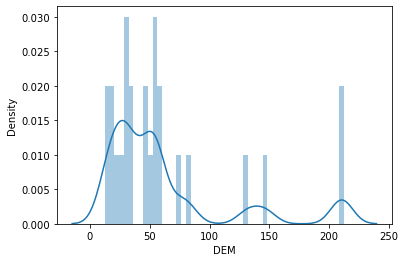

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


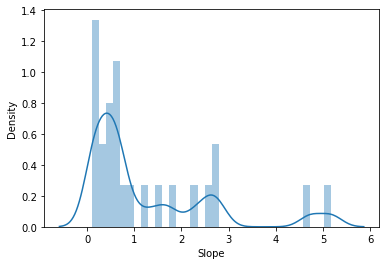

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


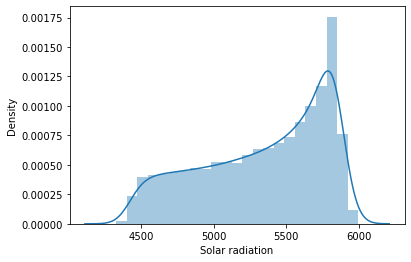

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


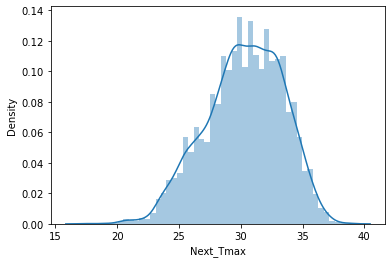

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


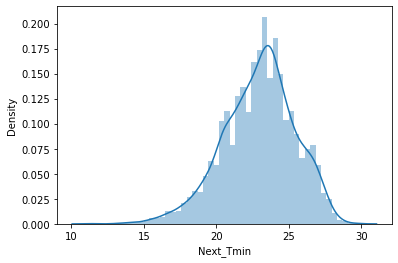

In [55]:
for i in data:
    sns.distplot(data[i])
    plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


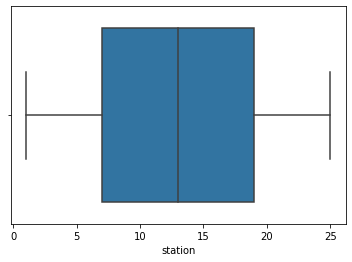

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


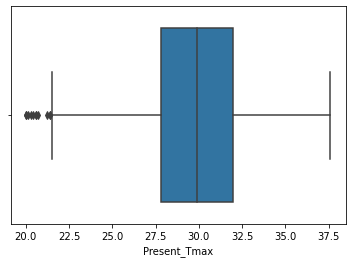

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


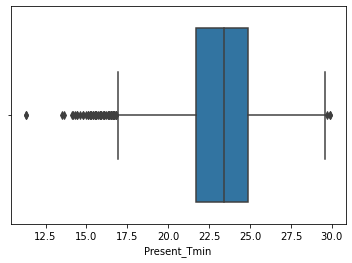

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


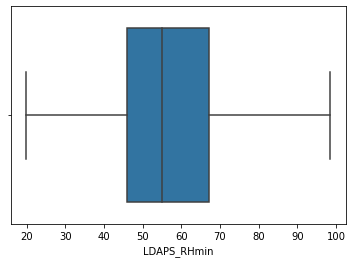

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


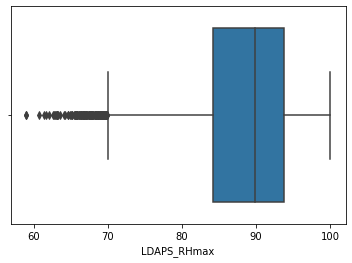

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


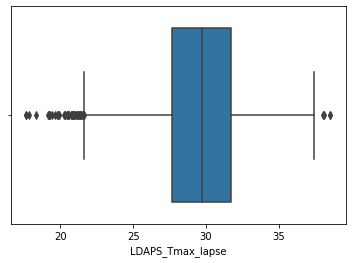

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


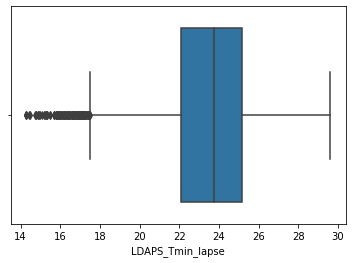

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


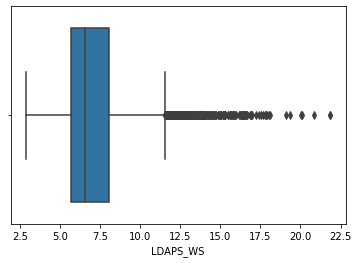

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


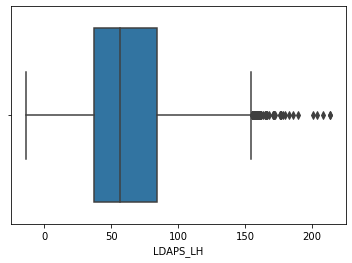

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


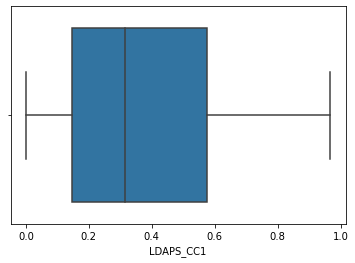

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


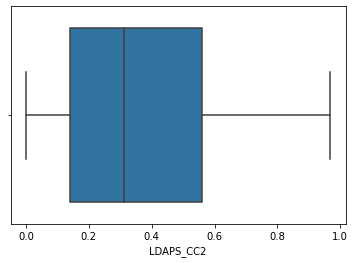

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


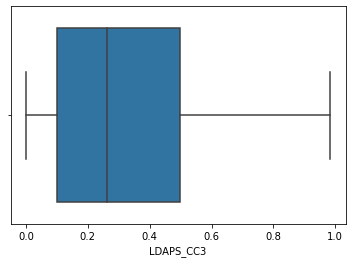

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


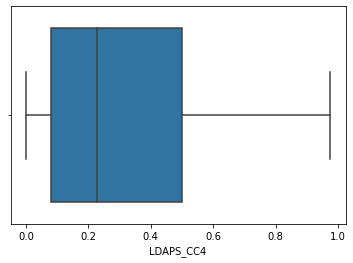

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


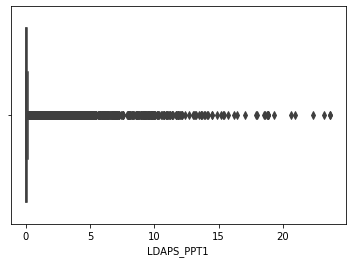

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


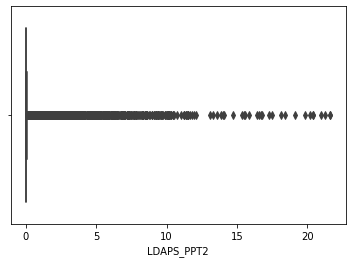

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


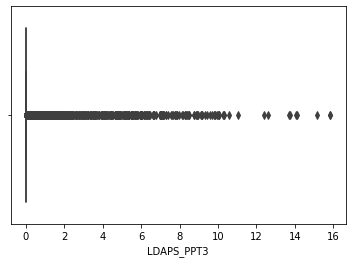

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


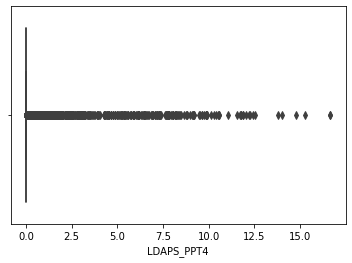

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


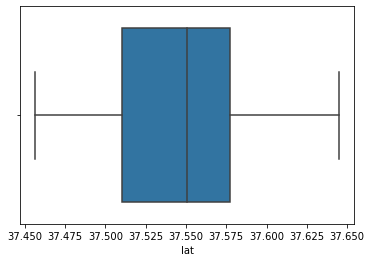

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


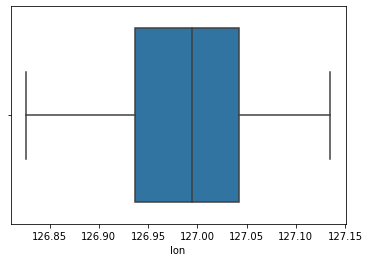

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


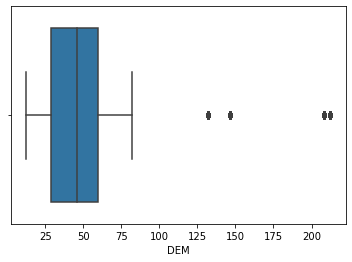

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


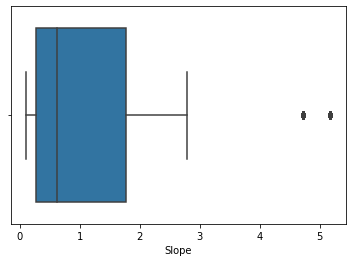

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


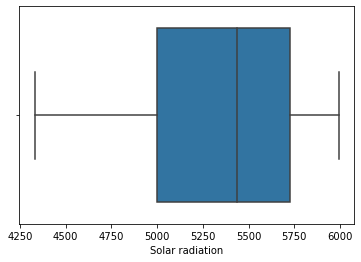

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


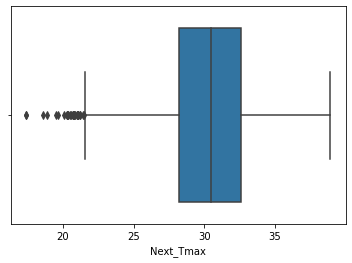

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


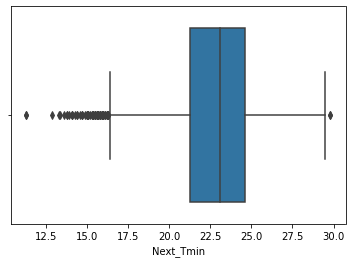

In [56]:
for i in data:
    sns.boxplot(data[i])
    plt.show()

# Treating Missing Values

In [57]:
df["Date"]=df["Date"].fillna(df["Date"].mode()[0])


In [58]:
df["station"]=df["station"].fillna(df["station"].median())


In [59]:
df.isnull().sum()

station              0
Date                 0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [60]:
df["Present_Tmax"]=df["Present_Tmax"].fillna(df["Present_Tmax"].median())

In [61]:
df["Present_Tmin"]=df["Present_Tmin"].fillna(df["Present_Tmin"].median())

In [62]:
df["LDAPS_RHmin"]=df["LDAPS_RHmin"].fillna(df["LDAPS_RHmin"].median())

In [63]:
df["LDAPS_RHmax"]=df["LDAPS_RHmax"].fillna(df["LDAPS_RHmax"].median())

In [64]:
df["LDAPS_Tmax_lapse"]=df["LDAPS_Tmax_lapse"].fillna(df["LDAPS_Tmax_lapse"].median())

In [65]:
df["LDAPS_Tmin_lapse"]=df["LDAPS_Tmin_lapse"].fillna(df["LDAPS_Tmin_lapse"].median())

In [66]:
df["LDAPS_WS"]=df["LDAPS_WS"].fillna(df["LDAPS_WS"].median())

In [67]:
df["LDAPS_LH"]=df["LDAPS_LH"].fillna(df["LDAPS_LH"].median())

In [68]:
df["LDAPS_CC1"]=df["LDAPS_CC1"].fillna(df["LDAPS_CC1"].median())

In [69]:
df["LDAPS_CC2"]=df["LDAPS_CC2"].fillna(df["LDAPS_CC2"].median())

In [70]:
df["LDAPS_CC3"]=df["LDAPS_CC3"].fillna(df["LDAPS_CC3"].median())

In [71]:
df["LDAPS_CC4"]=df["LDAPS_CC4"].fillna(df["LDAPS_CC4"].median())

In [72]:
df["LDAPS_PPT1"]=df["LDAPS_PPT1"].fillna(df["LDAPS_PPT1"].median())

In [73]:
df["LDAPS_PPT2"]=df["LDAPS_PPT2"].fillna(df["LDAPS_PPT2"].median())

In [74]:
df["LDAPS_PPT3"]=df["LDAPS_PPT3"].fillna(df["LDAPS_PPT3"].median())

In [75]:
df["LDAPS_PPT4"]=df["LDAPS_PPT4"].fillna(df["LDAPS_PPT4"].median())

In [76]:
df["Next_Tmax"]=df["Next_Tmax"].fillna(df["Next_Tmax"].median())

In [77]:
df["Next_Tmin"]=df["Next_Tmin"].fillna(df["Next_Tmin"].median())

In [78]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7752 non-null   float64
 1   Date              7752 non-null   object 
 2   Present_Tmax      7752 non-null   float64
 3   Present_Tmin      7752 non-null   float64
 4   LDAPS_RHmin       7752 non-null   float64
 5   LDAPS_RHmax       7752 non-null   float64
 6   LDAPS_Tmax_lapse  7752 non-null   float64
 7   LDAPS_Tmin_lapse  7752 non-null   float64
 8   LDAPS_WS          7752 non-null   float64
 9   LDAPS_LH          7752 non-null   float64
 10  LDAPS_CC1         7752 non-null   float64
 11  LDAPS_CC2         7752 non-null   float64
 12  LDAPS_CC3         7752 non-null   float64
 13  LDAPS_CC4         7752 non-null   float64
 14  LDAPS_PPT1        7752 non-null   float64
 15  LDAPS_PPT2        7752 non-null   float64
 16  LDAPS_PPT3        7752 non-null   float64


In [80]:
df.skew()

station             0.000000
Present_Tmax       -0.265337
Present_Tmin       -0.369481
LDAPS_RHmin         0.303565
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.228767
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.465003
LDAPS_CC2           0.477041
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340943
Next_Tmin          -0.405143
dtype: float64

In [82]:
df["Date"].unique()

array(['30-06-2013', '01-07-2013', '02-07-2013', '03-07-2013',
       '04-07-2013', '05-07-2013', '06-07-2013', '07-07-2013',
       '08-07-2013', '09-07-2013', '10-07-2013', '11-07-2013',
       '12-07-2013', '13-07-2013', '14-07-2013', '15-07-2013',
       '16-07-2013', '17-07-2013', '18-07-2013', '19-07-2013',
       '20-07-2013', '21-07-2013', '22-07-2013', '23-07-2013',
       '24-07-2013', '25-07-2013', '26-07-2013', '27-07-2013',
       '28-07-2013', '29-07-2013', '30-07-2013', '31-07-2013',
       '01-08-2013', '02-08-2013', '03-08-2013', '04-08-2013',
       '05-08-2013', '06-08-2013', '07-08-2013', '08-08-2013',
       '09-08-2013', '10-08-2013', '11-08-2013', '12-08-2013',
       '13-08-2013', '14-08-2013', '15-08-2013', '16-08-2013',
       '17-08-2013', '18-08-2013', '19-08-2013', '20-08-2013',
       '21-08-2013', '22-08-2013', '23-08-2013', '24-08-2013',
       '25-08-2013', '26-08-2013', '27-08-2013', '28-08-2013',
       '29-08-2013', '30-08-2013', '30-06-2014', '01-07

# Label Encodng to convert to Numeric

In [83]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,290,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,290,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,290,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,290,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,290,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,304,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,304,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,304,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,13.0,0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [84]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

<AxesSubplot:>

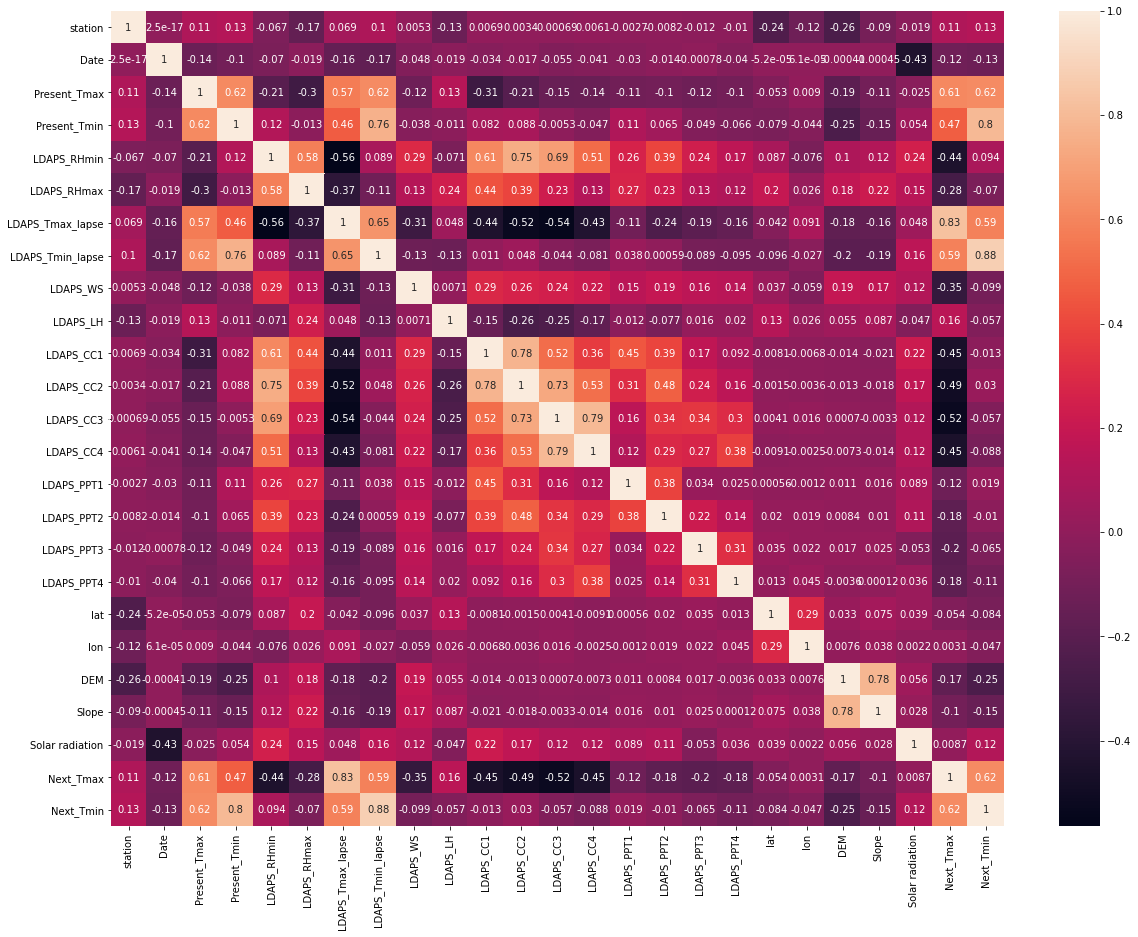

In [85]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [90]:
df1=df.drop(["LDAPS_CC1","LDAPS_CC4"],axis=1)

In [91]:
df1=df1.drop(["LDAPS_CC2","LDAPS_CC3","LDAPS_RHmax"],axis=1)

<AxesSubplot:>

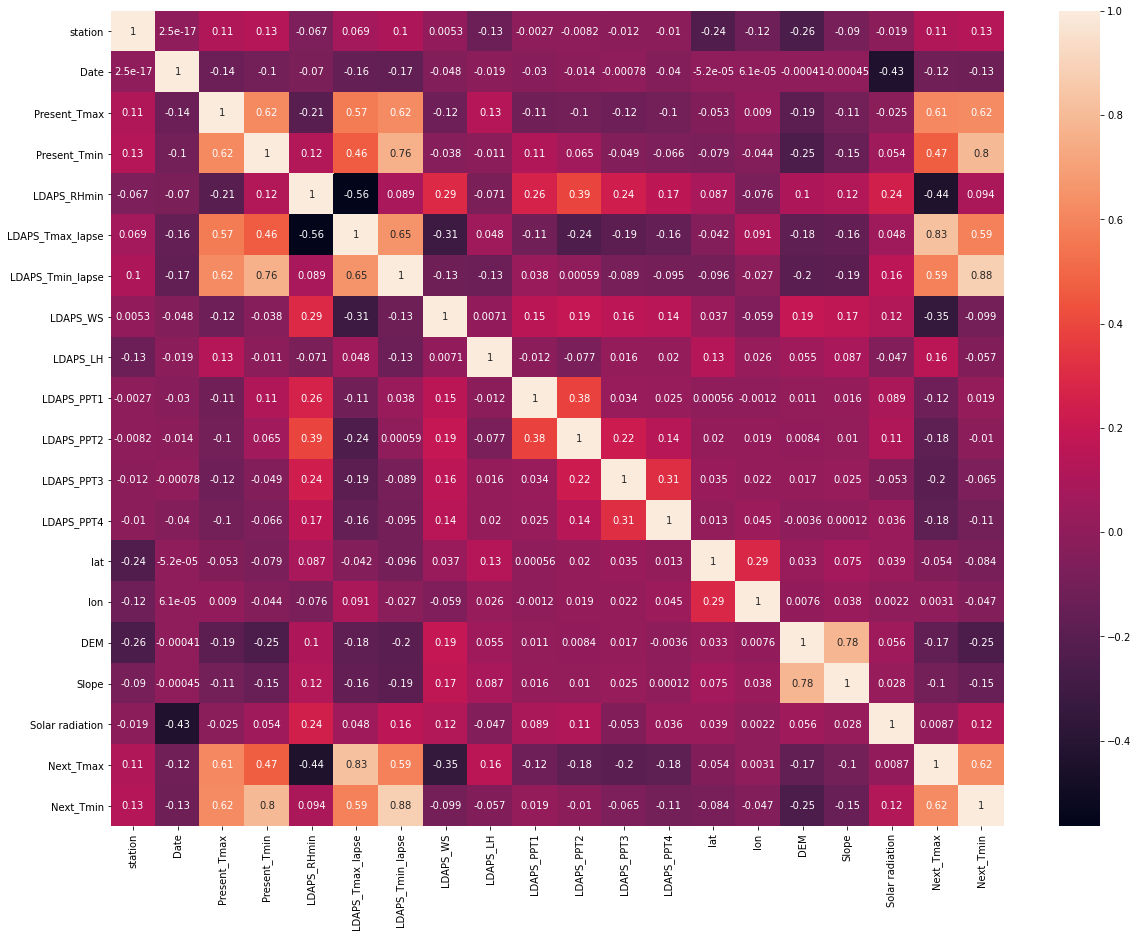

In [92]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),annot=True)

# Treating Outliers

In [93]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z.shape

(7752, 20)

In [94]:
z1=pd.DataFrame(z)
z1
z1.head(50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.664315,1.514214,0.361725,0.760169,0.103649,0.525183,0.217678,0.125893,0.208564,0.302656,0.273714,0.238242,0.222227,1.189286,0.005000,2.772243,1.115004,1.517935,0.376530,0.697829
1,1.525622,1.514214,0.720675,0.676937,0.306866,0.080598,0.222809,0.644345,0.313173,0.302656,0.273714,0.238242,0.222227,1.189286,0.511177,0.315157,0.542158,1.229950,0.071845,0.174298
2,1.386929,1.514214,0.619200,0.030530,0.551637,0.162639,0.450160,0.439018,1.247488,0.302656,0.273714,0.238242,0.222227,0.653021,0.838510,0.526218,0.723133,1.216534,0.264006,0.389506
3,1.248236,1.514214,0.754500,0.072146,0.102559,0.030795,0.080896,0.663593,0.097609,0.302656,0.273714,0.238242,0.222227,1.991696,0.385280,0.297588,0.932424,1.201176,0.456167,0.550592
4,1.109544,1.514214,0.551550,0.552090,0.038955,0.170621,0.012213,0.624511,1.355851,0.302656,0.273714,0.238242,0.222227,0.118743,1.807917,0.494322,0.548433,1.207205,0.296033,0.174298
5,0.970851,1.514214,0.720675,0.113761,0.294965,0.134679,0.131806,0.418744,0.363994,0.302656,0.273714,0.238242,0.222227,0.685654,0.637074,0.133199,0.810993,1.240362,0.392114,0.429777
6,0.832158,1.514214,0.551550,0.488303,0.031208,0.362277,0.309982,0.692536,1.866569,0.302656,0.273714,0.238242,0.222227,0.653021,1.931225,0.911963,0.845437,1.183159,0.199953,0.188147
7,0.693465,1.514214,0.788325,0.155377,0.302563,0.259941,0.130281,0.454570,0.608856,0.302656,0.273714,0.238242,0.222227,1.490051,1.024766,0.172266,0.223191,1.217552,0.264006,0.013211
8,0.554772,1.514214,0.551550,0.510474,0.096180,0.404860,0.078241,0.494723,0.675035,0.302656,0.273714,0.238242,0.222227,0.953787,2.082302,0.201502,0.616299,1.247634,0.328060,0.536742
9,0.416079,1.514214,0.619200,1.134710,0.006270,0.694785,0.423303,0.263923,0.016551,0.302656,0.273714,0.238242,0.222227,1.758184,0.458230,2.701715,2.861413,1.286566,0.071845,0.778372


In [95]:
df2=df1[(z<3).all(axis=1)]
df2

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,290,28.7,21.4,58.255688,28.074101,23.006936,6.818887,69.451805,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,290,31.9,21.6,52.263397,29.850689,24.035009,5.691890,51.937448,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,290,31.6,23.3,48.690479,30.091292,24.565633,6.138224,20.573050,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,290,32.0,23.4,58.239788,29.704629,23.326177,5.650050,65.727144,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,290,31.4,21.9,56.174095,29.113934,23.486480,5.735004,107.965535,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,304,23.1,17.8,24.688997,27.812697,18.303014,6.603253,9.614074,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,304,22.5,17.4,30.094858,26.704905,17.814038,5.768083,82.146707,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,304,23.3,17.1,26.741310,26.352081,18.775678,6.148918,72.058294,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,304,23.3,17.7,24.040634,27.010193,18.733519,6.542819,47.241457,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [96]:
Dataloss=((7752-6941)/7752)*100
Dataloss

10.461816305469556

Dataloss is more than 8%. so we will not treat outliers.

# Splitting DataFrame for predicting Tmax

In [99]:
x=df1.iloc[:,0:18]
y=df1.iloc[:,-2]
y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7747    28.3
7748    28.6
7749    27.8
7750    17.4
7751    38.9
Name: Next_Tmax, Length: 7752, dtype: float64

# Treating Skewness

In [100]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3202: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\Users\DELL\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\DELL\anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


# Scaling Data

In [101]:
from sklearn.preprocessing import StandardScaler
S=StandardScaler()
x=S.fit_transform(x)

# Linear Regression

In [102]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    pred_train=LR.predict(x_train)
    pred_test=LR.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.7471841726282815
At random state 0,the testing accuracy is:- 0.7529175022454679


At random state 1,the training accuracy is:- 0.7455029437772147
At random state 1,the testing accuracy is:- 0.7598996465047301


At random state 2,the training accuracy is:- 0.7494415636172498
At random state 2,the testing accuracy is:- 0.7440068342661955


At random state 3,the training accuracy is:- 0.7481557903106788
At random state 3,the testing accuracy is:- 0.7492662949894793


At random state 4,the training accuracy is:- 0.7436198461331734
At random state 4,the testing accuracy is:- 0.7671070212580361


At random state 5,the training accuracy is:- 0.7452462709058407
At random state 5,the testing accuracy is:- 0.7599907415933739


At random state 6,the training accuracy is:- 0.7485917214710086
At random state 6,the testing accuracy is:- 0.7470689994993291


At random state 7,the training accuracy is:- 0.7498376609633499
At random state 7,the testing acc

At random state 77,the training accuracy is:- 0.7487939474538896
At random state 77,the testing accuracy is:- 0.7466971264339823


At random state 78,the training accuracy is:- 0.745422096263868
At random state 78,the testing accuracy is:- 0.7602004403177394


At random state 79,the training accuracy is:- 0.7443059887399788
At random state 79,the testing accuracy is:- 0.765522316630118


At random state 80,the training accuracy is:- 0.7508744305883273
At random state 80,the testing accuracy is:- 0.7386745160392767


At random state 81,the training accuracy is:- 0.749775013909744
At random state 81,the testing accuracy is:- 0.7424764820530401


At random state 82,the training accuracy is:- 0.7491686429533115
At random state 82,the testing accuracy is:- 0.7453458544083806


At random state 83,the training accuracy is:- 0.7529299403388301
At random state 83,the testing accuracy is:- 0.7305701927455956


At random state 84,the training accuracy is:- 0.7478884248013127
At random state 84,th

Random state 27 will be used

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=27)

In [104]:
LR.fit(x_train,y_train)
pred_test=LR.predict(x_test)
print(r2_score(y_test,pred_test))

0.74878966494192


In [105]:
Accuracy_Train=r2_score(y_train,pred_train)
Accuracy_Test=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cvscore=cross_val_score(LR,x,y,cv=j)
    cvmean=cvscore.mean()
    print(f"At cross fold {j} the cv score is {cvmean} and accuracy score for training is {Accuracy_Train} and accuracy for the testing is {Accuracy_Test}")
    print("\n")

At cross fold 2 the cv score is 0.674942220307668 and accuracy score for training is -0.7385448412673086 and accuracy for the testing is 0.74878966494192


At cross fold 3 the cv score is 0.7115122328342146 and accuracy score for training is -0.7385448412673086 and accuracy for the testing is 0.74878966494192


At cross fold 4 the cv score is 0.6843640768736945 and accuracy score for training is -0.7385448412673086 and accuracy for the testing is 0.74878966494192


At cross fold 5 the cv score is 0.679984705727631 and accuracy score for training is -0.7385448412673086 and accuracy for the testing is 0.74878966494192


At cross fold 6 the cv score is 0.6844604928426952 and accuracy score for training is -0.7385448412673086 and accuracy for the testing is 0.74878966494192


At cross fold 7 the cv score is 0.6780991066109543 and accuracy score for training is -0.7385448412673086 and accuracy for the testing is 0.74878966494192


At cross fold 8 the cv score is 0.6693064527039805 and accur

use fold CV=3 

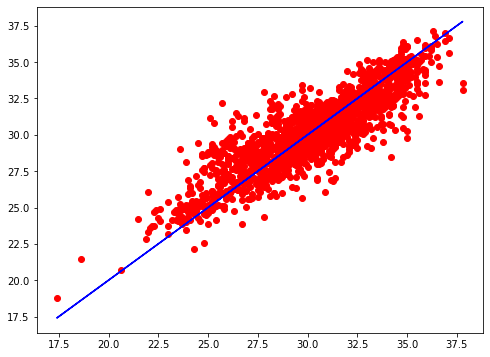

In [106]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test, color='b')

# Lasso

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':[27],'selection':["cyclic","random"],'precompute':[True,False]}
Las= Lasso()
FitParameters= GridSearchCV(Las,parameters)
FitParameters.fit(x_train,y_train)

print(FitParameters.best_params_)

{'alpha': 0.01, 'precompute': True, 'random_state': 27, 'selection': 'random'}


In [108]:
Las = Lasso(alpha=0.01,random_state=27,precompute=True,selection="random")
Las.fit(x_train,y_train)
Las.score(x_train,y_train)
pred_lasso = Las.predict(x_test)

Lasso = r2_score(y_test,pred_lasso)
Lasso

0.7480434816450836

In [109]:
cvscore=cross_val_score(Las,x,y,cv=3)
cvmean=cvscore.mean()
cvmean

0.7116074432856608

# Random Forest

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"],'random_state':[27],'bootstrap':[True,False]}
rf =RandomForestRegressor()
FitParameters = GridSearchCV(rf,parameters)
FitParameters.fit(x_train,y_train)
print(FitParameters.best_params_)

{'bootstrap': False, 'criterion': 'mse', 'max_features': 'sqrt', 'random_state': 27}


In [111]:
rf= RandomForestRegressor(criterion="mse",max_features="sqrt",random_state=27,bootstrap=False)
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x_train,y_train,cv=3)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 90.13667082126112
Cross Val Score: 88.86247314924832


# DTR

In [113]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae','poisson'], 'splitter':['best', 'random'],'max_features':["auto","sqrt","log2"],'random_state':[27]}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto', 'random_state': 27, 'splitter': 'best'}


In [114]:
DTR = DecisionTreeRegressor(criterion='mse', splitter='best',random_state=27,max_features='auto')
DTR.fit(x_train,y_train)
DTR.score(x_train,y_train)
pred_decision = DTR.predict(x_test)

dts = r2_score(y_test,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(DTR,x_train,y_train,cv=3)
dtc = dtscore.mean() 
print('Cross Val Score:',dtc*100)

R2 Score: 70.61317260898699
Cross Val Score: 71.18041174867548


# SVR

In [115]:
from sklearn.svm import LinearSVR
parameters = {'loss':['epsilon_insensitive', 'squared_epsilon_insensitive'], 'random_state':[27],'fit_intercept':[True,False]}
SVR =LinearSVR()
clf = GridSearchCV(SVR,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'fit_intercept': True, 'loss': 'squared_epsilon_insensitive', 'random_state': 27}


In [116]:
SVR = LinearSVR(fit_intercept=True, loss='squared_epsilon_insensitive',random_state=27)
SVR.fit(x_train,y_train)
SVR.score(x_train,y_train)
pred_decision = SVR.predict(x_test)

SVRs = r2_score(y_test,pred_decision)
print('R2 Score:',SVRs*100)

SVRscore = cross_val_score(SVR,x_train,y_train,cv=3)
SVRc = SVRscore.mean() 
print('Cross Val Score:',SVRc*100)

R2 Score: 74.87919211695764
Cross Val Score: 74.60315764166255


From the above we could see that Random Forest is the best fit

In [117]:
import pickle
filename = 'TF.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [118]:
import numpy as np
a=np.array(y_test)
a

array([33.7, 28.8, 26.7, ..., 37.8, 27. , 25.2])

In [119]:
predicted=np.array(rf.predict(x_test))
predicted

array([34.091, 30.854, 27.183, ..., 34.919, 27.048, 25.598])

In [120]:
conclusion=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
conclusion

,original,predicted
0,33.7,34.091
1,28.8,30.854
2,26.7,27.183
3,29.2,30.421
4,26.8,28.878
...,...,...
1546,36.1,35.648
1547,27.1,28.272
1548,37.8,34.919
1549,27.0,27.048


# Splitting Data Frame for predicting Tmin

In [123]:
x1=df1.iloc[:,0:18]
y1=df1.iloc[:,-1]
x1

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,1.0,290,28.7,21.4,58.255688,28.074101,23.006936,6.818887,69.451805,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996
1,2.0,290,31.9,21.6,52.263397,29.850689,24.035009,5.691890,51.937448,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500
2,3.0,290,31.6,23.3,48.690479,30.091292,24.565633,6.138224,20.573050,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664
3,4.0,290,32.0,23.4,58.239788,29.704629,23.326177,5.650050,65.727144,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844
4,5.0,290,31.4,21.9,56.174095,29.113934,23.486480,5.735004,107.965535,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,304,23.3,17.1,26.741310,26.352081,18.775678,6.148918,72.058294,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965
7748,24.0,304,23.3,17.7,24.040634,27.010193,18.733519,6.542819,47.241457,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535
7749,25.0,304,23.2,17.4,22.933014,27.939516,18.522965,7.289264,9.090034,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215
7750,13.0,0,20.0,11.3,19.794666,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508


In [124]:
from sklearn.preprocessing import power_transform
x1=power_transform(x1,method='yeo-johnson')

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3202: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\Users\DELL\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\DELL\anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


# Scaling Data

In [125]:
from sklearn.preprocessing import StandardScaler
S=StandardScaler()
x1=S.fit_transform(x1)

# Linear Regression

In [126]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    pred_train=LR.predict(x_train)
    pred_test=LR.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.825907867505776
At random state 0,the testing accuracy is:- 0.8260493068107252


At random state 1,the training accuracy is:- 0.8248793384847144
At random state 1,the testing accuracy is:- 0.8308525163256185


At random state 2,the training accuracy is:- 0.82555096449257
At random state 2,the testing accuracy is:- 0.8275114106370749


At random state 3,the training accuracy is:- 0.8265564814709683
At random state 3,the testing accuracy is:- 0.8237389298408151


At random state 4,the training accuracy is:- 0.8229645251656663
At random state 4,the testing accuracy is:- 0.8382269798377243


At random state 5,the training accuracy is:- 0.8253014816215875
At random state 5,the testing accuracy is:- 0.828513121801284


At random state 6,the training accuracy is:- 0.8245160275602837
At random state 6,the testing accuracy is:- 0.8316409925803916


At random state 7,the training accuracy is:- 0.8236140217212937
At random state 7,the testing accurac

At random state 93,the training accuracy is:- 0.8234267690748613
At random state 93,the testing accuracy is:- 0.8354027521977978


At random state 94,the training accuracy is:- 0.8257868301453388
At random state 94,the testing accuracy is:- 0.8271706269426774


At random state 95,the training accuracy is:- 0.8263704623825301
At random state 95,the testing accuracy is:- 0.8244265819652021


At random state 96,the training accuracy is:- 0.8263747737139107
At random state 96,the testing accuracy is:- 0.8244733086942875


At random state 97,the training accuracy is:- 0.8256313099080684
At random state 97,the testing accuracy is:- 0.827601684046013


At random state 98,the training accuracy is:- 0.8246688564419635
At random state 98,the testing accuracy is:- 0.8308131923132356


At random state 99,the training accuracy is:- 0.8244429440963185
At random state 99,the testing accuracy is:- 0.8319160951562465




we can use Random state=41

In [127]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=41)

In [128]:
LR.fit(x_train,y_train)
pred_test=LR.predict(x_test)
print(r2_score(y_test,pred_test))

0.8261546481063584


In [129]:
Accuracy_Train=r2_score(y_train,pred_train)
Accuracy_Test=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cvscore=cross_val_score(LR,x,y,cv=j)
    cvmean=cvscore.mean()
    print(f"At cross fold {j} the cv score is {cvmean} and accuracy score for training is {Accuracy_Train} and accuracy for the testing is {Accuracy_Test}")
    print("\n")

At cross fold 2 the cv score is 0.8089240856610185 and accuracy score for training is -0.8049965611536825 and accuracy for the testing is 0.8261546481063584


At cross fold 3 the cv score is 0.7829139770069379 and accuracy score for training is -0.8049965611536825 and accuracy for the testing is 0.8261546481063584


At cross fold 4 the cv score is 0.7921508453660584 and accuracy score for training is -0.8049965611536825 and accuracy for the testing is 0.8261546481063584


At cross fold 5 the cv score is 0.7802563147293451 and accuracy score for training is -0.8049965611536825 and accuracy for the testing is 0.8261546481063584


At cross fold 6 the cv score is 0.7656032365071749 and accuracy score for training is -0.8049965611536825 and accuracy for the testing is 0.8261546481063584


At cross fold 7 the cv score is 0.7735427926059311 and accuracy score for training is -0.8049965611536825 and accuracy for the testing is 0.8261546481063584


At cross fold 8 the cv score is 0.774725219739

We will choose CV=2

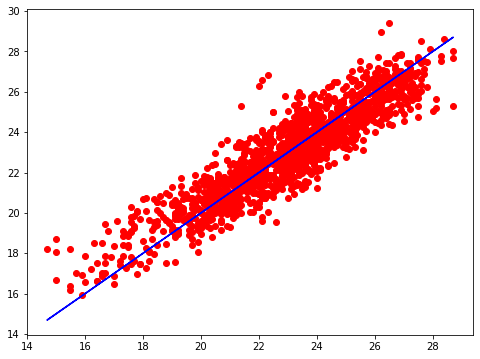

In [130]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test, color='b')

# Lasso

In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':[41],'selection':["cyclic","random"],'precompute':[True,False]}
Las= Lasso()
FitParameters= GridSearchCV(Las,parameters)
FitParameters.fit(x_train,y_train)

print(FitParameters.best_params_)

{'alpha': 0.0001, 'precompute': True, 'random_state': 41, 'selection': 'cyclic'}


In [132]:
Las = Lasso(alpha=0.0001,random_state=41,precompute=True,selection="cyclic")
Las.fit(x_train,y_train)
Las.score(x_train,y_train)
pred_lasso = Las.predict(x_test)

Lasso = r2_score(y_test,pred_lasso)
Lasso

0.8261594336332627

In [133]:
cvscore=cross_val_score(Las,x,y,cv=2)
cvmean=cvscore.mean()
cvmean

0.8089130340881072

# Random Forest

In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"],'random_state':[41],'bootstrap':[True,False]}
rf =RandomForestRegressor()
FitParameters = GridSearchCV(rf,parameters)
FitParameters.fit(x_train,y_train)
print(FitParameters.best_params_)

{'bootstrap': False, 'criterion': 'mse', 'max_features': 'sqrt', 'random_state': 41}


In [135]:
rf= RandomForestRegressor(criterion="mse",max_features="sqrt",random_state=37,bootstrap=False)
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x_train,y_train,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 92.56926051115667
Cross Val Score: 90.74841405615906


# DTR

In [136]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae','poisson'], 'splitter':['best', 'random'],'max_features':["auto","sqrt","log2"],'random_state':[41]}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'friedman_mse', 'max_features': 'auto', 'random_state': 41, 'splitter': 'best'}


In [137]:
DTR = DecisionTreeRegressor(criterion='friedman_mse', splitter='best',random_state=41,max_features='auto')
DTR.fit(x_train,y_train)
DTR.score(x_train,y_train)
pred_decision = DTR.predict(x_test)

dts = r2_score(y_test,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(DTR,x_train,y_train,cv=5)
dtc = dtscore.mean() 
print('Cross Val Score:',dtc*100)

R2 Score: 76.76481635004227
Cross Val Score: 76.87445333691356


# SVR

In [138]:
from sklearn.svm import LinearSVR
parameters = {'loss':['epsilon_insensitive', 'squared_epsilon_insensitive'], 'random_state':[41],'fit_intercept':[True,False]}
SVR =LinearSVR()
clf = GridSearchCV(SVR,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

{'fit_intercept': True, 'loss': 'squared_epsilon_insensitive', 'random_state': 41}


In [139]:
SVR = LinearSVR(fit_intercept=True, loss='squared_epsilon_insensitive',random_state=41)
SVR.fit(x_train,y_train)
SVR.score(x_train,y_train)
pred_decision = SVR.predict(x_test)

SVRs = r2_score(y_test,pred_decision)
print('R2 Score:',SVRs*100)

SVRscore = cross_val_score(SVR,x_train,y_train,cv=5)
SVRc = SVRscore.mean() 
print('Cross Val Score:',SVRc*100)

R2 Score: 82.6167642565174
Cross Val Score: 82.48328228244517


From the above we could see random forest is the best fit

In [141]:
import pickle
filename = 'TF1.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [142]:
import numpy as np
a=np.array(y_test)
a

array([25.3, 22.7, 24.1, ..., 22. , 23.6, 21.6])

In [143]:
predicted=np.array(rf.predict(x_test))
predicted

array([25.05 , 22.323, 23.828, ..., 21.344, 23.86 , 20.796])

In [144]:
conclusion=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
conclusion

,original,predicted
0,25.3,25.050
1,22.7,22.323
2,24.1,23.828
3,26.9,26.859
4,20.2,21.369
...,...,...
1546,24.0,23.529
1547,22.0,21.962
1548,22.0,21.344
1549,23.6,23.860
